In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('datasets/absenteeism_at_work_aaa/absenteeism_at_work.csv', sep=';')

In [27]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [28]:
len(df)

740

In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day_,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               740 non-null    int64  
 1   reason_for_absence               740 non-null    int64  
 2   month_of_absence                 740 non-null    int64  
 3   day_of_the_week                  740 non-null    int64  
 4   seasons                          740 non-null    int64  
 5   transportation_expense           740 non-null    int64  
 6   distance_from_residence_to_work  740 non-null    int64  
 7   service_time                     740 non-null    int64  
 8   age                              740 non-null    int64  
 9   work_load_average/day_           740 non-null    float64
 10  hit_target                       740 non-null    int64  
 11  disciplinary_failure             740 non-null    int64  
 12  education             

In [31]:
# check for missing values
df.isnull().sum()

id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day_             0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
dtype: int64

In [32]:
print(df.describe().T)

                                 count        mean        std      min  \
id                               740.0   18.017568  11.021247    1.000   
reason_for_absence               740.0   19.216216   8.433406    0.000   
month_of_absence                 740.0    6.324324   3.436287    0.000   
day_of_the_week                  740.0    3.914865   1.421675    2.000   
seasons                          740.0    2.544595   1.111831    1.000   
transportation_expense           740.0  221.329730  66.952223  118.000   
distance_from_residence_to_work  740.0   29.631081  14.836788    5.000   
service_time                     740.0   12.554054   4.384873    1.000   
age                              740.0   36.450000   6.478772   27.000   
work_load_average/day_           740.0  271.490235  39.058116  205.917   
hit_target                       740.0   94.587838   3.779313   81.000   
disciplinary_failure             740.0    0.054054   0.226277    0.000   
education                        740.0

In [33]:
df_min_max = df[['absenteeism_time_in_hours', 'work_load_average/day_', 'transportation_expense',
                 'distance_from_residence_to_work', 'service_time']].agg(['min', 'max'])
print(df_min_max)

     absenteeism_time_in_hours  work_load_average/day_  \
min                          0                 205.917   
max                        120                 378.884   

     transportation_expense  distance_from_residence_to_work  service_time  
min                     118                                5             1  
max                     388                               52            29  


In [34]:
type_mapping_day = {2 : 'Monday', 3 : 'Tuesday', 4 : 'Wednesday', 5 : 'Thursday', 6 : 'Friday'}
df['day_of_the_week'] = df['day_of_the_week'].map(type_mapping_day)
type_mapping_season = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['seasons'] = df['seasons'].map(type_mapping_season)
type_mapping_month = {1 : 'January', 2: 'February', 3: 'March', 4: 'April', 5 : 'May', 6: 'June', 7: 'July', 8: 'August',
                      9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['month_of_absence'] = df['month_of_absence'].map(type_mapping_month)
type_mapping_discipline = {1 : 'yes', 0 : 'no'}
df['disciplinary_failure'] = df['disciplinary_failure'].map(type_mapping_discipline)
type_mapping_education = {1 : 'high_school', 2 : 'graduate', 3 : 'postgraduate', 4 : 'master_doctor'}
df['education'] = df['education'].map(type_mapping_education)
type_mapping_drinker = {1 : 'yes', 0 : 'no'}
df['social_drinker'] = df['social_drinker'].map(type_mapping_drinker)
type_mapping_smoker = {1 : 'yes', 0 : 'no'}
df['social_smoker'] = df['social_smoker'].map(type_mapping_smoker)


In [35]:
df.head()

,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day_,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,11,26,July,Tuesday,Winter,289,36,13,33,239.554,...,no,high_school,2,yes,no,1,90,172,30,4
1,36,0,July,Tuesday,Winter,118,13,18,50,239.554,...,yes,high_school,1,yes,no,0,98,178,31,0
2,3,23,July,Wednesday,Winter,179,51,18,38,239.554,...,no,high_school,0,yes,no,0,89,170,31,2
3,7,7,July,Thursday,Winter,279,5,14,39,239.554,...,no,high_school,2,yes,yes,0,68,168,24,4
4,11,23,July,Thursday,Winter,289,36,13,33,239.554,...,no,high_school,2,yes,no,1,90,172,30,2


<AxesSubplot:xlabel='social_drinker', ylabel='Count'>

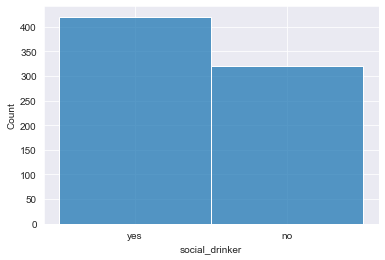

In [38]:
sns.histplot(df.social_drinker)

<AxesSubplot:xlabel='social_smoker', ylabel='Count'>

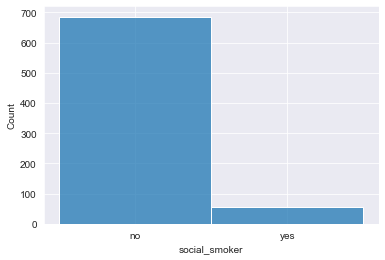

In [39]:
sns.histplot(df.social_smoker)

<AxesSubplot:xlabel='disciplinary_failure', ylabel='Count'>

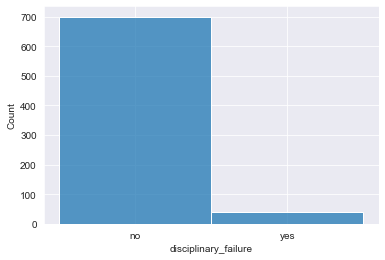

In [40]:
sns.histplot(df.disciplinary_failure)

<AxesSubplot:xlabel='seasons', ylabel='Count'>

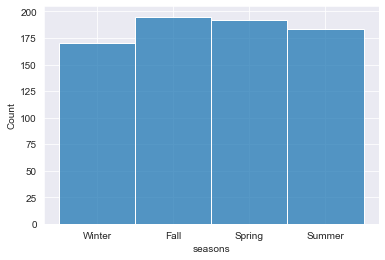

In [41]:
sns.histplot(df.seasons)

<AxesSubplot:xlabel='education', ylabel='Count'>

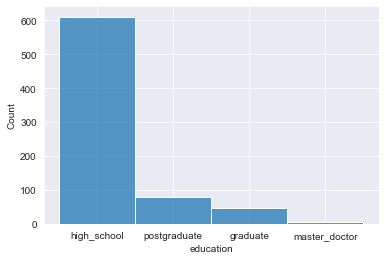

In [42]:
sns.histplot(df.education)

<AxesSubplot:xlabel='day_of_the_week', ylabel='Count'>

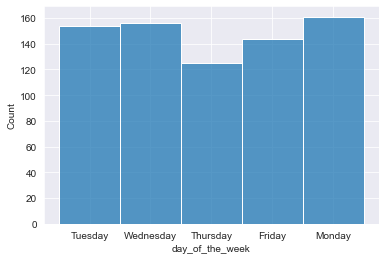

In [43]:
sns.histplot(df.day_of_the_week)

<AxesSubplot:xlabel='reason_for_absence', ylabel='Count'>

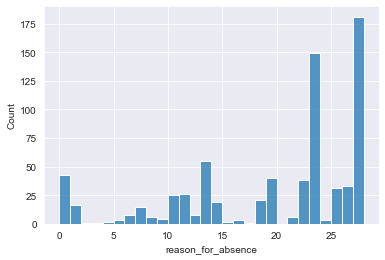

In [49]:
sns.histplot(df.reason_for_absence, bins=28)

In [48]:
# get unique values from 'reason_for_absence' column
print(df['reason_for_absence'].unique())
print(df['reason_for_absence'].nunique())

[26  0 23  7 22 19  1 11 14 21 10 13 28 18 25 24  6 27 17  8 12  5  9 15
  4  3  2 16]
28


In [51]:
df['reason_for_absence'].value_counts(ascending=True)

3       1
17      1
2       1
4       2
15      2
16      3
5       3
24      3
9       4
21      6
8       6
12      8
6       8
7      15
1      16
14     19
18     21
10     25
11     26
25     31
26     33
22     38
19     40
0      43
13     55
27     69
28    112
23    149
Name: reason_for_absence, dtype: int64

<AxesSubplot:xlabel='distance_from_residence_to_work', ylabel='Count'>

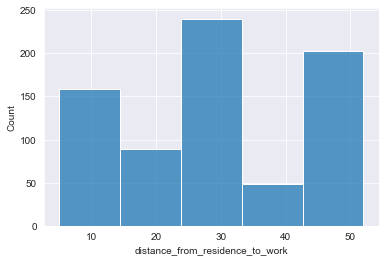

In [53]:
sns.histplot(df.distance_from_residence_to_work, bins=5)